<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [7]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


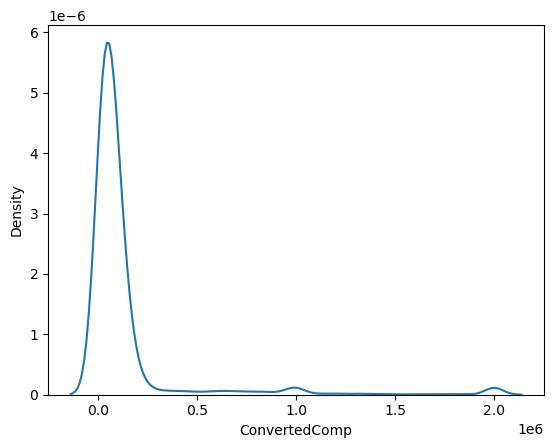

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# seaborn histogram

sns.kdeplot(df['ConvertedComp'])
plt.show()

Plot the histogram for the column `ConvertedComp`.


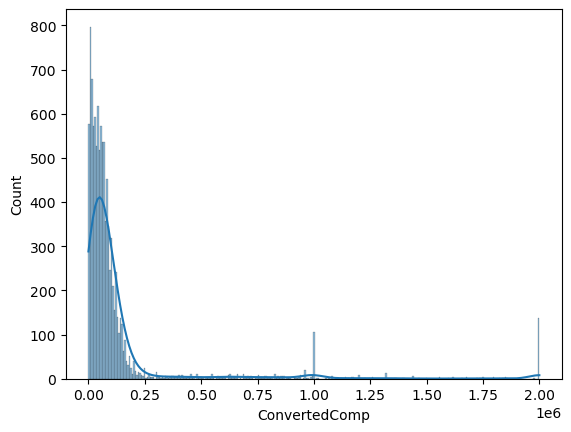

In [15]:
sns.histplot(df['ConvertedComp'],kde=True)
plt.show()

What is the median of the column `ConvertedComp`?


In [21]:
df.ConvertedComp.median()

57745.0

How many responders identified themselves only as a **Man**?


In [30]:
df.Gender.value_counts()


Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [42]:
df.groupby('Gender')['ConvertedComp'].median()


Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

In [45]:
df.loc[df['Gender']=='Woman', ['ConvertedComp']].median()

ConvertedComp    57708.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [49]:
df.Age.describe().loc[['min','25%','mean','75%','max']]


min     16.000000
25%     25.000000
mean    30.778895
75%     35.000000
max     99.000000
Name: Age, dtype: float64

In [68]:
df.Age.median()

29.0

Plot a histogram of the column `Age`.


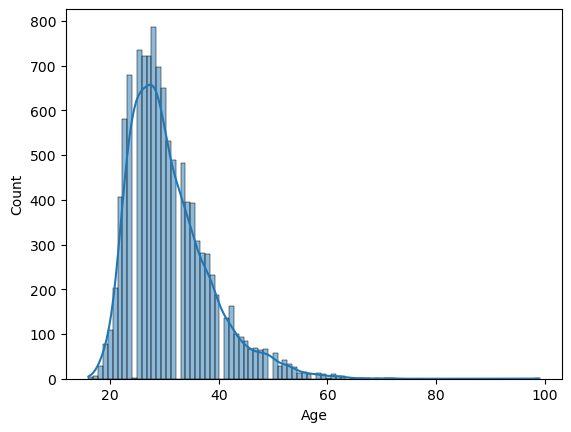

In [46]:
sns.histplot(df['Age'],kde=True)
plt.show()


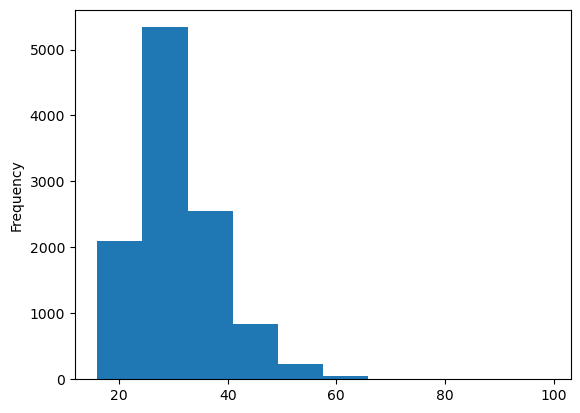

In [50]:
df.Age.plot(kind='hist')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

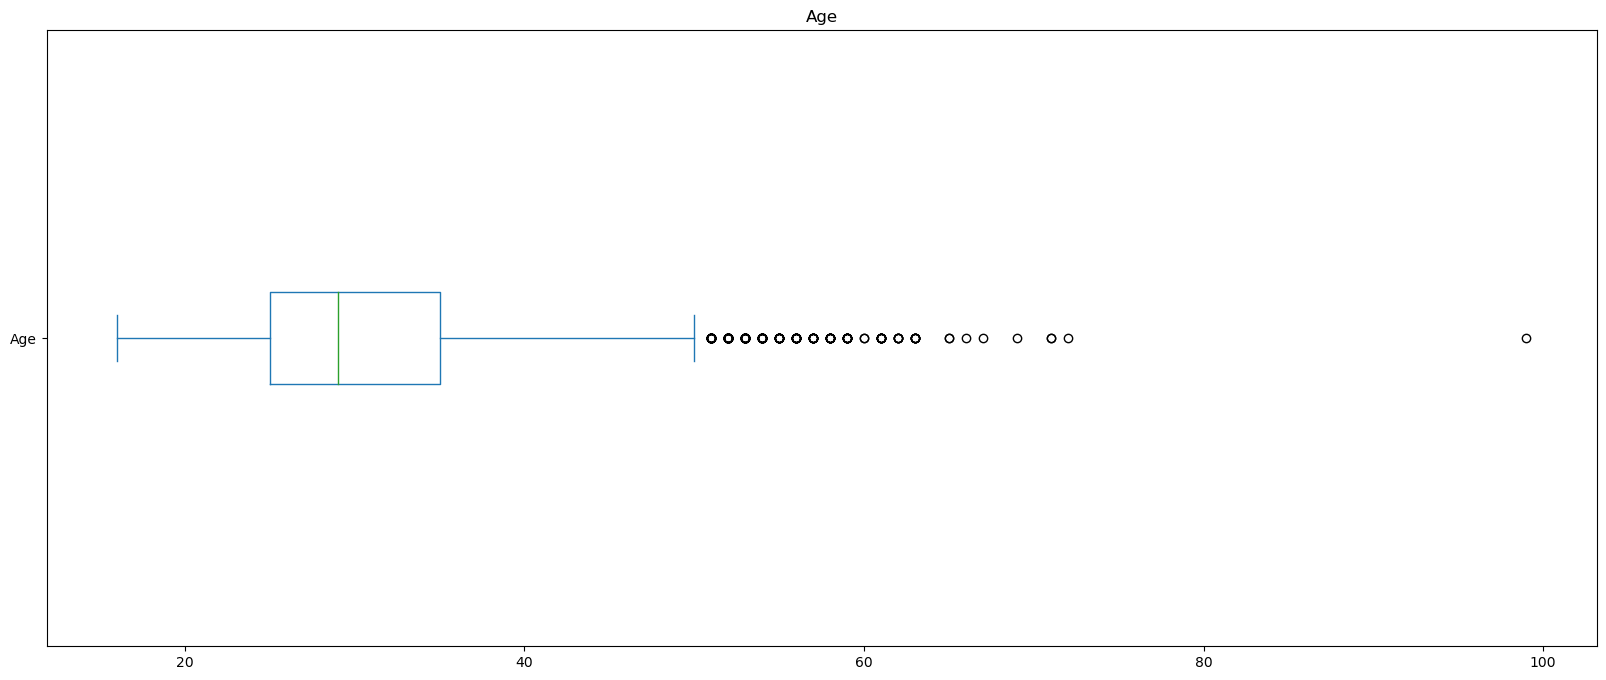

In [70]:
df['Age'].plot.box(figsize=(20,8),vert=False)

plt.title('Age')

plt.show

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<function matplotlib.pyplot.show(close=None, block=None)>

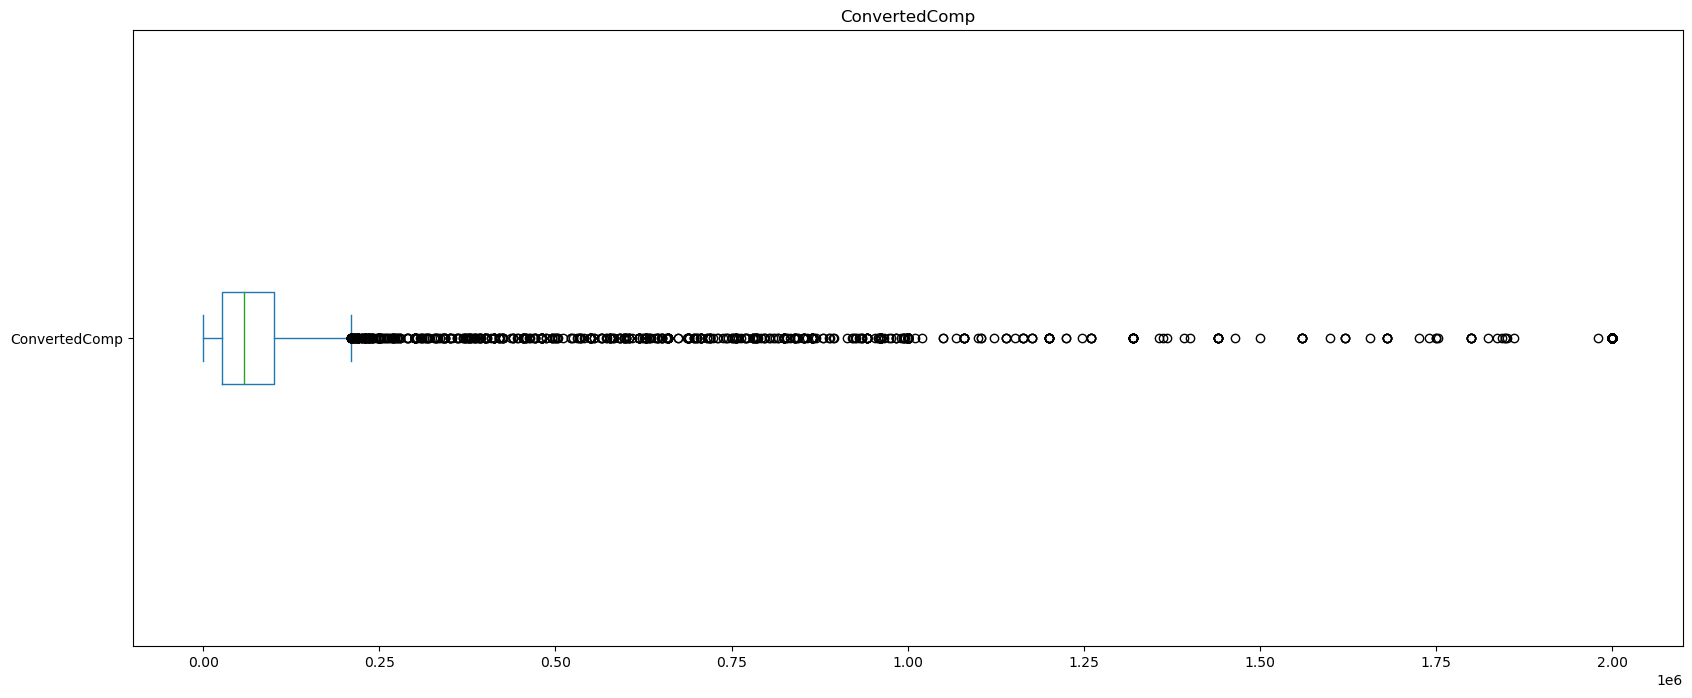

In [52]:
df['ConvertedComp'].plot.box(figsize=(20,8),vert=False)

plt.title('ConvertedComp')

plt.show


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [60]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('IQR: ', IQR)

IQR:  73132.0


Find out the upper and lower bounds.


In [58]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower Bounds: ', lower_bound )
print('Upper Bounds: ', upper_bound )

Lower Bounds:  -82830.0
Upper Bounds:  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [61]:
((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum()  


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [63]:
df1= df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))]
df1['ConvertedComp'].median()

52704.0

In [71]:
df1['ConvertedComp'].mean()

59883.20838915799

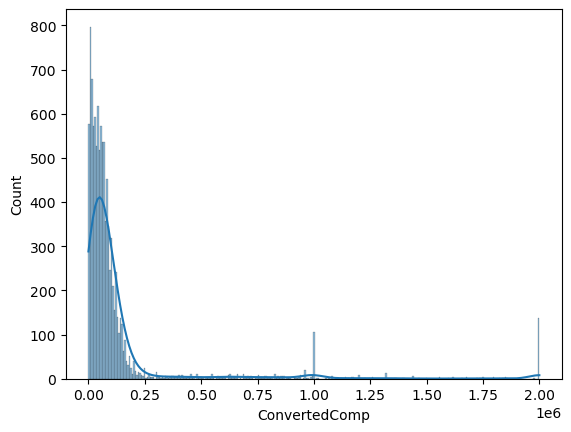

In [64]:
# ConvertedComp with Outliers
sns.histplot(df['ConvertedComp'],kde=True)
plt.show()

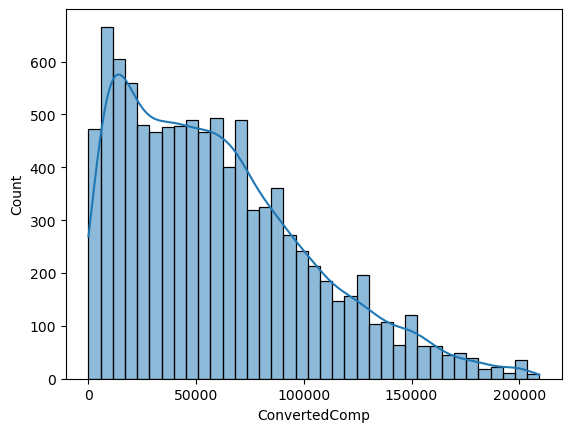

In [65]:
# ConvertedComp with Outliers Removed
sns.histplot(df1['ConvertedComp'],kde=True)
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [75]:
df.corr(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
